In [2]:
import sys, os
sys.path.append(os.path.dirname(os.getcwd())) # Include ../SSD in path
import numpy as np
import torch
import matplotlib.pyplot as plt
import pandas as pd
import dataset_exploration.analyze_stuff as analyze
import statistics
from vizer.draw import draw_boxes
from tops.config import instantiate, LazyConfig
from ssd import utils
#import configs.retinaNet_focal_loss as config
np.random.seed(0)

In [3]:

basepath = '/work/alexaram/project_tdt4265/assignment4/SSD/data/tdt4265_2022/train_annotations.json'
df = pd.read_json(basepath,lines = True)
#print(df.to_string()) 

2022-04-30 13:23:01,135 [INFO ] NumExpr defaulting to 8 threads.


In [60]:
BATCH_SIZE = 1
SET_TYPE = 'train'
CFG_PATH = 'configs/retinaNet_focal_loss.py'

cfg = analyze.get_config(CFG_PATH)
#print(cfg)
metadata = analyze.load_annotation_file(cfg, SET_TYPE)
#number of times a value appears = (df['image_id']==1).sum()
# occourence_classes = df['category_id'].value_counts()
annotations = metadata['annotations']
df = pd.DataFrame(data=annotations)


df_categorys = df.loc[df['category_id']==1]
hight = []
width = []
x = []
y = []
class_dict = {"car":[], "truck":[], "bus":[], "MC":[], "bicycle":[], "scooter":[], "person":[], "rider":[]}
# 
for i in range(len(df_categorys)):
     list = df_categorys['bbox'].values[i]
     x.append(list[0])
     y.append(list[1])
     hight.append(list[3])
     width.append(list[2])
dict = {'x':x,'y':y,'h':hight,'w':width}
df_bbox = pd.DataFrame(dict)  
c= 0
ratio_list = []
for i, val_h in enumerate(hight):
     val_w = width[i]
     val = val_h/val_w
     ratio_list.append(val)
     if  0.5<val<2:
          c +=1
print(len(hight))
print(c)
median = statistics.median(ratio_list)
mean = statistics.mean(ratio_list)
print(median)
print(mean)
df_categorys

Saving SSD outputs to: outputs/
9563
8464
1.0436809815950936
1.1253778817475042


,bbox,area,category_id,image_id,id,segmentation,iscrowd
0,"[725.93, 63.64, 20.40000000000009, 13.73999999...",280.2960,1,1,1,[],0
4,"[107.8, 78.1, 37.3, 39.0]",1454.7000,1,1,5,[],0
5,"[206.4, 84.9, 32.0, 42.599999999999994]",1363.2000,1,1,6,[],0
8,"[730.6, 64.18, 20.539999999999964, 14.71999999...",302.3488,1,2,9,[],0
12,"[107.1, 79.04, 35.400000000000006, 37.75]",1336.3500,1,2,13,[],0
...,...,...,...,...,...,...,...
18273,"[508.78, 71.93, 16.050000000000068, 13.5099999...",216.8355,1,1600,18274,[],0
18276,"[513.29, 71.38, 16.050000000000068, 13.5100000...",216.8355,1,1601,18277,[],0
18279,"[518.16, 71.82, 16.06000000000006, 13.51000000...",216.9706,1,1602,18280,[],0
18282,"[523.03, 72.26, 16.06000000000006, 13.50999999...",216.9706,1,1603,18283,[],0


In [61]:
# CARS
BATCH_SIZE = 1
SET_TYPE = 'train'
CFG_PATH = 'configs/retinaNet_focal_loss.py'

cfg = analyze.get_config(CFG_PATH)
#print(cfg)
metadata = analyze.load_annotation_file(cfg, SET_TYPE)
#number of times a value appears = (df['image_id']==1).sum()
# occourence_classes = df['category_id'].value_counts()
annotations = metadata['annotations']
df = pd.DataFrame(data=annotations)
df.describe()


Saving SSD outputs to: outputs/


,area,category_id,image_id,id,iscrowd
count,18287.000000,18287.000000,18287.000000,18287.000000,18287.0
mean,786.196452,3.670531,741.209602,9144.000000,0.0
std,2311.536107,2.940587,418.599343,5279.146522,0.0
min,9.990000,1.000000,1.000000,1.000000,0.0
25%,121.077000,1.000000,395.000000,4572.500000,0.0
50%,261.116100,1.000000,699.000000,9144.000000,0.0
75%,675.330500,7.000000,1055.500000,13715.500000,0.0
max,51046.400000,8.000000,1604.000000,18287.000000,0.0


Saving SSD outputs to: outputs/
_____________________________BBOX Statistics_______________________
________________________ car ________________________
                 x            y        hight        width
count  9563.000000  9563.000000  9563.000000  9563.000000
mean    369.639971    73.522972    26.056165    28.405052
std     294.578663    10.256469    15.649342    26.552494
min       0.000000     1.550000     3.320000     2.700000
25%      48.715000    67.225000    13.060000    13.365000
50%     442.300000    72.750000    21.760000    19.670000
75%     511.505000    78.320000    37.290000    32.870000
max    1020.090000   121.040000   126.450000   256.420000
________________________ truck ________________________
                x           y       hight       width
count  123.000000  123.000000  123.000000  123.000000
mean   209.688374   37.351463   54.770325   56.147967
std    253.488957   22.219830   41.132320   82.911809
min      1.280000    0.000000   14.430000    8.33000

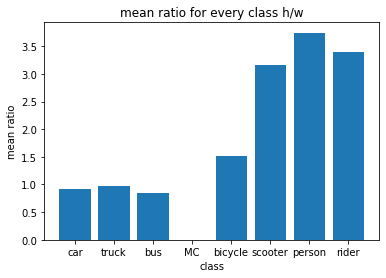

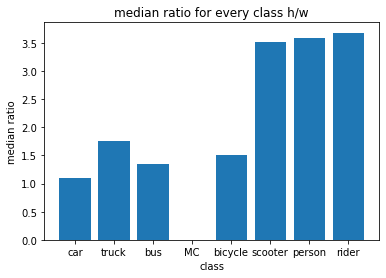

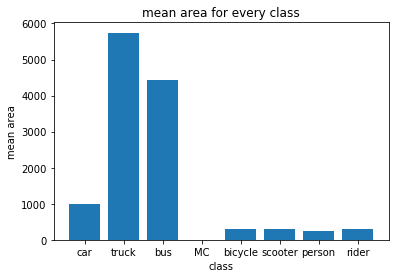

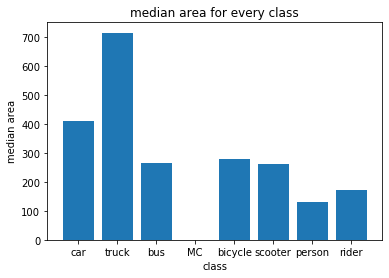

2022-05-03 19:59:16,091 [WARNI] posx and posy should be finite values
2022-05-03 19:59:16,152 [WARNI] posx and posy should be finite values


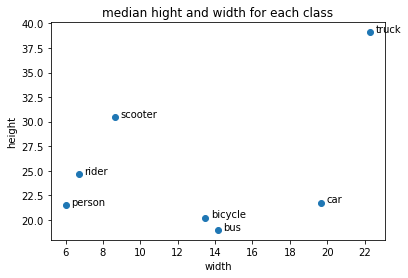

2022-05-03 19:59:16,200 [WARNI] posx and posy should be finite values
2022-05-03 19:59:16,258 [WARNI] posx and posy should be finite values


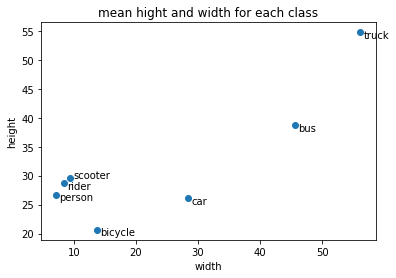

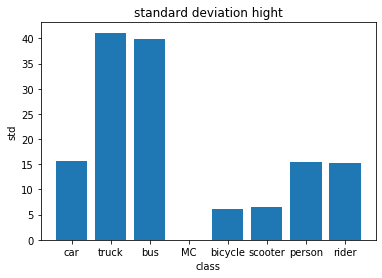

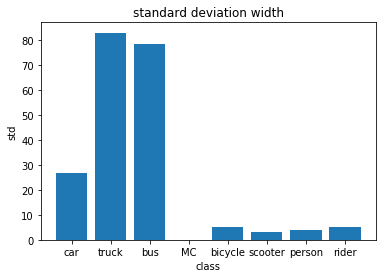

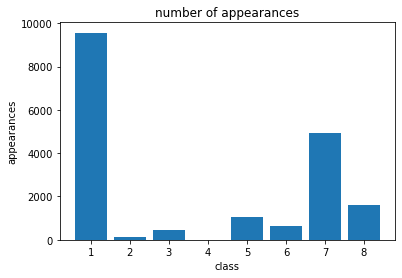

In [64]:
BATCH_SIZE = 1
SET_TYPE = 'train'
CFG_PATH = 'configs/retinaNet_focal_loss.py'

cfg = analyze.get_config(CFG_PATH)
#print(cfg)
metadata = analyze.load_annotation_file(cfg, SET_TYPE)
#number of times a value appears = (df['image_id']==1).sum()
# occourence_classes = df['category_id'].value_counts()
annotations = metadata['annotations']
df = pd.DataFrame(data=annotations)
#df=df.iloc[9000:,:]   #exploring only parts of the data

class_dict = {"car":[], "truck":[], "bus":[], "MC":[], "bicycle":[], "scooter":[], "person":[], "rider":[]}
class_names = ("car", "truck", "bus", "MC", "bicycle", "scooter", "person", "rider")
hights_median = []
widths_median = []
hights_mean = []
widths_mean = []
hights_std = []
widths_std = []
mean_ratio = []
median_ratio = []
areas = []
print('_____________________________BBOX Statistics_______________________')
for i,class_name in enumerate(class_names):
     
     
     df_class = df.loc[df['category_id']==i+1]
     hight = []
     width = []
     x = []
     y = []
     for j in range(len(df_class)):
          list = df_class['bbox'].values[j]
          x.append(list[0])
          y.append(list[1])          
          width.append(list[2])
          hight.append(list[3])
     dict = {'x':x,'y':y,'hight':hight,'width':width}
     df_bbox = pd.DataFrame(dict)      
     bbox_description = df_bbox.describe()
     print('________________________',class_name,'________________________')
     print(bbox_description) # uncomment to see the entire description for each class
     hights_median.append(bbox_description['hight']['50%'])
     widths_median.append(bbox_description['width']['50%'])
     hights_mean.append(bbox_description['hight']['mean'])
     widths_mean.append(bbox_description['width']['mean'])
     hights_std.append(bbox_description['hight']['std'])
     widths_std.append(bbox_description['width']['std'])
     
areas_mean = []
areas_median = []
print('\n','\n','\n','\n','_________________AREA statistics________________________')
for i,class_name in enumerate(class_names):     
     print('________________________',class_name,'________________________')
     df_class = df.loc[df['category_id']==i+1]        
     area_description = df_class['area'].describe()
     areas_mean.append(area_description['mean'])
     areas_median.append(area_description['50%'])
     print(area_description)
     #areas.append(area_description)
for i,class_name in enumerate(class_names):  
     mean_ratio.append(hights_mean[i]/widths_mean[i])    
     median_ratio.append(hights_median[i]/widths_median[i]) 




# Plots
plt.bar(class_names,mean_ratio)
plt.xlabel('class')
plt.ylabel('mean ratio')
plt.title('mean ratio for every class h/w')
plt.show()

plt.bar(class_names,median_ratio)
plt.xlabel('class')
plt.ylabel('median ratio')
plt.title('median ratio for every class h/w')
plt.show()

plt.bar(class_names,areas_mean)
plt.xlabel('class')
plt.ylabel('mean area')
plt.title('mean area for every class')
plt.show()

plt.bar(class_names,areas_median)
plt.xlabel('class')
plt.ylabel('median area')
plt.title('median area for every class')
plt.show()

plt.scatter(widths_median,hights_median)
plt.xlabel('width')
plt.ylabel('height')
plt.title('median hight and width for each class')
for i,txt in enumerate(class_names):
     plt.text(widths_median[i]+0.3,hights_median[i],txt)
plt.show()



plt.scatter(widths_mean,hights_mean)


plt.xlabel('width')
plt.ylabel('height')
plt.title('mean hight and width for each class')
for i,txt in enumerate(class_names):
     if txt != 'scooter':
          plt.text(widths_mean[i]+0.5,hights_mean[i]-1,txt)
     else:
          plt.text(widths_mean[i]+0.5,hights_mean[i],txt)
plt.show()

plt.bar(class_names,hights_std)
plt.xlabel('class')
plt.ylabel('std')
plt.title('standard deviation hight')
plt.show()

plt.bar(class_names,widths_std)
plt.xlabel('class')
plt.ylabel('std')
plt.title('standard deviation width')
plt.show()

occourence_classes = df['category_id'].value_counts()
plt.bar(occourence_classes.index,occourence_classes.values)
plt.xlabel('class')
plt.ylabel('appearances')
plt.title('number of appearances')
plt.show()